<a href="https://colab.research.google.com/github/draglar/Hypothaloid_Prescence/blob/main/Ian_Muigai_IP_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- determining the best parameters , gamma and penalizer (c) , for the Linear kernel using grid search

- Using the best parameters obtained in the grid serch to make the SVC model using the linear kernel

- Checking the accuracy of the model

- Creating a heatmap of the confusion matrix to see the predictions and errors made by the model

## Specifying the question

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism.  We are required to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Determining the metrics of success

> Success of the model would be accepted it the model procuces an accuracy score of over 80%

## Understanding the context

> Nairobi hospital which is a leading hospital, wants a study on the factors that affect hypothyroidism using the given information from tests conducted in a clinical camp.

## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thyroid = pd.read_csv('https://raw.githubusercontent.com/draglar/Hypothaloid_Prescence/main/hypothyroid.csv')

## Previewing the dataset

In [ ]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## Cleaning

### Checking for null and duplicated values

In [ ]:
thyroid.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

> There were no null values

In [ ]:
thyroid.duplicated().sum()

77

In [3]:
thyroid.drop_duplicates(inplace=True)

> Droping the 77 duplicated values

### Accuracy of the dataset

In [ ]:
for name in list(thyroid.columns):
 print(thyroid[name].value_counts(),'\n')

negative       2945
hypothyroid     141
Name: status, dtype: int64 

?     438
59     63
62     61
60     60
72     59
     ... 
93      1
98      1
8       1
5       1
90      1
Name: age, Length: 93, dtype: int64 

F    2119
M     894
?      73
Name: sex, dtype: int64 

f    2640
t     446
Name: on_thyroxine, dtype: int64 

f    3031
t      55
Name: query_on_thyroxine, dtype: int64 

f    3044
t      42
Name: on_antithyroid_medication, dtype: int64 

f    2983
t     103
Name: thyroid_surgery, dtype: int64 

f    2851
t     235
Name: query_hypothyroid, dtype: int64 

f    2851
t     235
Name: query_hyperthyroid, dtype: int64 

f    3025
t      61
Name: pregnant, dtype: int64 

f    2989
t      97
Name: sick, dtype: int64 

f    3046
t      40
Name: tumor, dtype: int64 

f    3084
t       2
Name: lithium, dtype: int64 

f    2990
t      96
Name: goitre, dtype: int64 

y    2631
n     455
Name: TSH_measured, dtype: int64 

0       893
?       455
0.90     75
0.70     74
0.80     68
    

- TSH == ? --> TSH_Measured == n
- T3  == ? --> T3 _measured == n
- TT4 == ? --> TT4_Measured == n
- T4U == ? --> T4U_measured == n
- FTI == ? --> FTI_Measured == n
- TGB == ? --> tgb measured == n

> This show they were not measured

Moreover for attibutes like age and gender , a definitive conclusion on the values is not present henve would be best to drop them

> Proven. Meaning the ? represent the tests not performed, this could be due to no need for the test by the physisian, also eliminating these values leads to a dataset of 4 values 

> This could also be as a result of the doctor concluding due to tests taken those values would be within the normal range and hence concluded it as unnecessary to carry the tests out

### Dropping coulumns and rows

In [4]:
import statistics
def fix(name,mn,mx):
  av=statistics.mean([mn,mx])
  thyroid[name][thyroid[name]=='?']=av

In [5]:
thyroid[['TBG_measured','TBG']][thyroid.TBG_measured=='n'].value_counts()

TBG_measured  TBG
n             ?      2835
dtype: int64

> TGB has so few entries compared to the dataset

In [6]:
thyroid[~(thyroid.TBG=='?')]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40,F,f,f,f,f,f,f,f,f,f,f,f,y,70,y,0.40,y,3.90,y,0.83,y,5,y,28
37,hypothyroid,40,F,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.30,y,6.60,y,0.93,y,7,y,28
67,hypothyroid,?,F,f,f,f,f,f,f,f,f,f,f,f,y,17,y,1.10,y,24,y,0.99,y,24,y,34
166,negative,60,M,t,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,0
190,negative,54,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,negative,45,F,f,f,f,f,f,f,f,f,f,f,t,n,?,n,?,n,?,n,?,n,?,y,20
3110,negative,55,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,30
3112,negative,24,F,f,f,f,f,f,f,f,f,f,f,t,n,?,n,?,n,?,n,?,n,?,y,108
3124,negative,40,F,f,f,f,f,f,t,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,29


> Furthermore most of the values with TBG entries have most of the other entries as null

In [7]:
thyroid.drop((thyroid[~(thyroid['TBG']=='?')]).index,inplace=True)
thyroid.drop(['TBG_measured','TBG'],axis=1,inplace=True)

> I droped all the entries with TBG measured for uniformity, and droped TBG_measured and TGB

In [8]:
thyroid[['FTI_measured','FTI']][thyroid.FTI=='?'].value_counts()

Series([], dtype: int64)

> The values of FTI tests not taken were removed along witht the TBG

In [9]:
thyroid[['T4U_measured','T4U']][thyroid.T4U=='?'].value_counts()

T4U_measured  T4U
n             ?      1
dtype: int64

> most of he values of T4U tests not taken were removed along witht the TBG
 * Therefore it was removed

In [10]:
thyroid.drop((thyroid[thyroid['T4U']=='?']).index,inplace=True)

In [11]:
thyroid[['TT4_measured','TT4']][thyroid.TT4=='?'].value_counts()

TT4_measured  TT4
n             ?      1
dtype: int64

> most of he values of TT4 tests not taken were removed along witht the TBG
 * Therefore it was removed

In [12]:
thyroid.drop((thyroid[thyroid['TT4']=='?']).index,inplace=True)

> Most of the above columns ended up getting removed by the values removed from the TBG values that were removed to ensure uniformity such that the dataset only contains those whose TBG was not measured

In [13]:
thyroid[['T3_measured','T3']][thyroid.T3_measured=='n'].value_counts()

T3_measured  T3
n            ?     432
dtype: int64

In [14]:
fix('T3',0.2,0.5 )


> The values of the tests not taken were filled in with values from 

* fixed using https://www.medicalnewstoday.com/articles/t3-levels#normal-t-3

In [15]:
thyroid[['TSH_measured','TSH']][thyroid.TSH_measured=='n'].value_counts()

TSH_measured  TSH
n             ?      207
dtype: int64

In [16]:
fix('TSH',0.4,4)


> The values of the tests not taken were filled in with values from 

* Fixed from https://www.medicalnewstoday.com/articles/326774#by-sex

In [17]:
thyroid[['age']][thyroid.age=='?'].value_counts()

age
?      409
dtype: int64

In [18]:
thyroid.drop((thyroid[thyroid['age']=='?']).index,inplace=True)

In [19]:
thyroid[['sex']][thyroid.sex=='?'].value_counts()

sex
?      14
dtype: int64

In [20]:
thyroid.drop((thyroid[thyroid['sex']=='?']).index,inplace=True)

In [21]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     2410 non-null   object
 1   age                        2410 non-null   object
 2   sex                        2410 non-null   object
 3   on_thyroxine               2410 non-null   object
 4   query_on_thyroxine         2410 non-null   object
 5   on_antithyroid_medication  2410 non-null   object
 6   thyroid_surgery            2410 non-null   object
 7   query_hypothyroid          2410 non-null   object
 8   query_hyperthyroid         2410 non-null   object
 9   pregnant                   2410 non-null   object
 10  sick                       2410 non-null   object
 11  tumor                      2410 non-null   object
 12  lithium                    2410 non-null   object
 13  goitre                     2410 non-null   object
 14  TSH_meas

> 676 rows dropped with unknown values

In [22]:
thyroid.drop(['TSH_measured','T3_measured','TT4_measured','FTI_measured','T4U_measured'],axis=1,inplace=True)

### Changing column data types

In [23]:
thyroid['age']=thyroid['age'].astype('float')
names=thyroid.iloc[:,14:]
for col in names:
  thyroid[col]=thyroid[col].astype('float')


In [24]:
names=thyroid.iloc[:,14:]

### Checking for outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


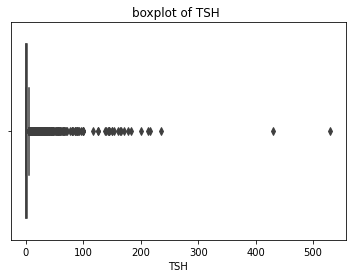

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


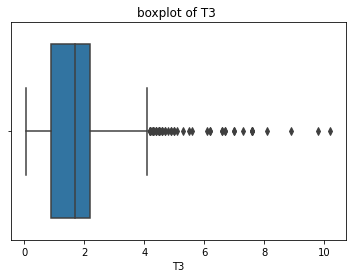

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


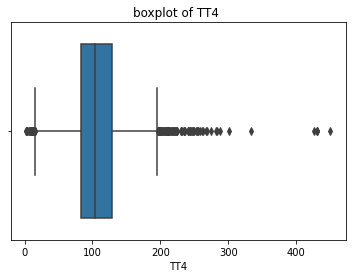

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


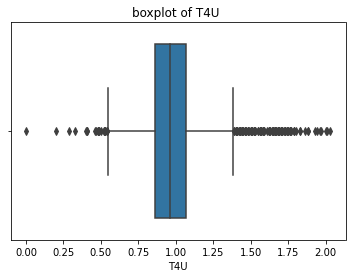

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


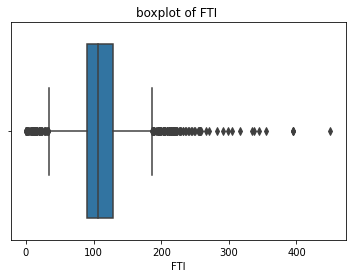

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


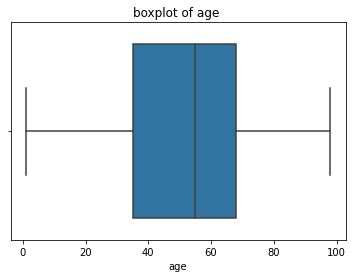

In [ ]:
names['age']=thyroid['age']
for name in names:
  plt.title8(f'boxplot of {name} ')
  sns.boxplot(thyroid[name])
  plt.show()

In [ ]:
def outs(x):
  global a

  p1,p3=np.percentile(a[x],[25,75])
  iqr=p3-p1
  l_bound=p1-(1.5*iqr)
  u_bound=p3+(1.5*iqr)
  a=a[~((a[x]<l_bound)|(a[x]>u_bound))]

In [ ]:
a=names.copy()
for name in list(names.columns):
  outs(name)
a.shape

(1801, 6)

> 1801 outliers, quite alot to remove from the dataset.

## External dataset validation

 Two column missing values were filled using values obtained from
* https://www.medicalnewstoday.com/articles/t3-levels#normal-t-3
* https://www.medicalnewstoday.com/articles/326774#by-sex

## EDA

### Univariate analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


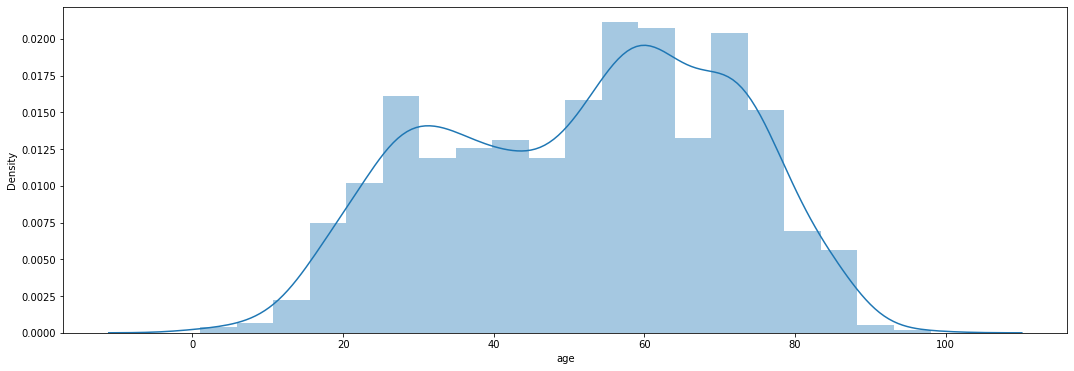

In [ ]:
plt.subplots(figsize=(18,6))
sns.distplot(thyroid.age)

> Age is distributed from 20 to 80 years with it peaking between 

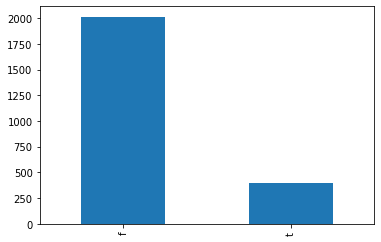

In [ ]:
thyroid['on_thyroxine'].value_counts().plot(kind='bar',rot=0)

> Most of the patients were not on thyroxine

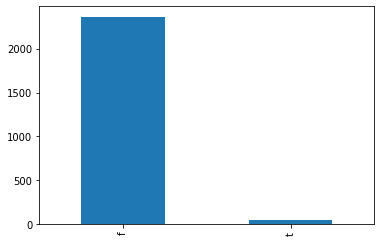

In [ ]:
thyroid['query_on_thyroxine'].value_counts().plot(kind='bar')

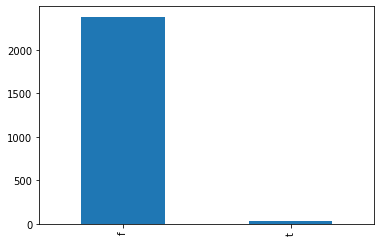

In [ ]:
thyroid['on_antithyroid_medication'].value_counts().plot(kind='bar')

> Most patients were not on antithyroid medication

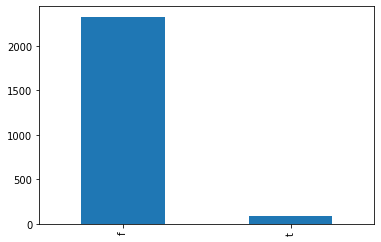

In [ ]:
thyroid['thyroid_surgery'].value_counts().plot(kind='bar')

> Most patients had not undergone Thyroid surgery

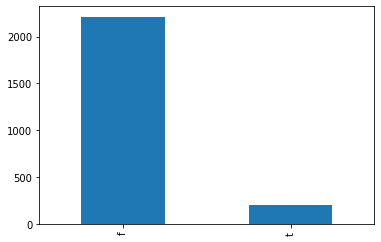

In [ ]:
thyroid['query_hypothyroid'].value_counts().plot(kind='bar')

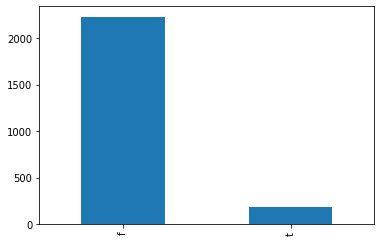

In [ ]:
thyroid['query_hyperthyroid'].value_counts().plot(kind='bar')

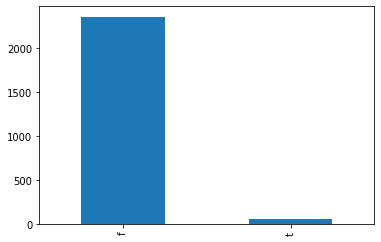

In [ ]:
thyroid['pregnant'].value_counts().plot(kind='bar')

> Very few patients were pregnant

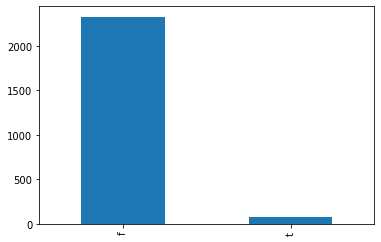

In [ ]:
thyroid['sick'].value_counts().plot(kind='bar')

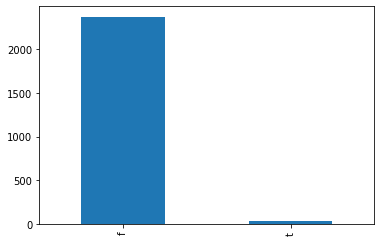

In [ ]:
thyroid['tumor'].value_counts().plot(kind='bar')

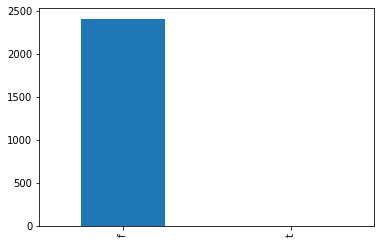

In [ ]:
thyroid['lithium'].value_counts().plot(kind='bar')

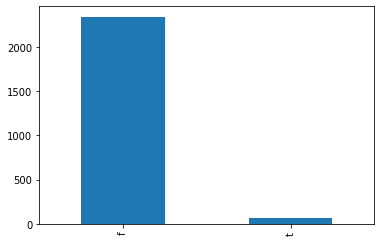

In [ ]:
thyroid['goitre'].value_counts().plot(kind='bar')

### Bivariate analysis

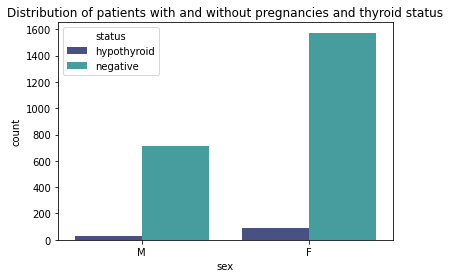

In [ ]:
sns.countplot(x='sex', hue='status', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

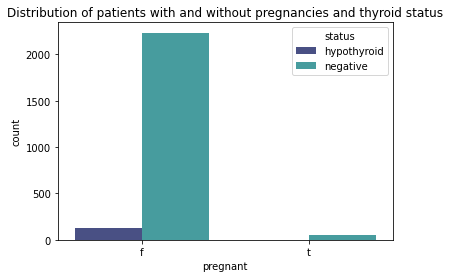

In [ ]:
sns.countplot(x='pregnant', hue='status', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

> Women are more prone to Hypothyroid

>

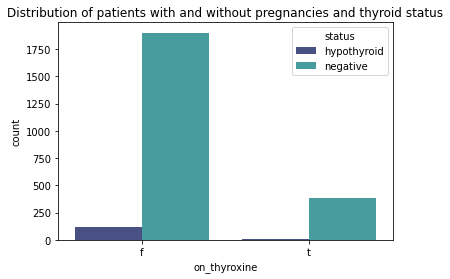

In [ ]:
sns.countplot(x='on_thyroxine', hue='status', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

> 

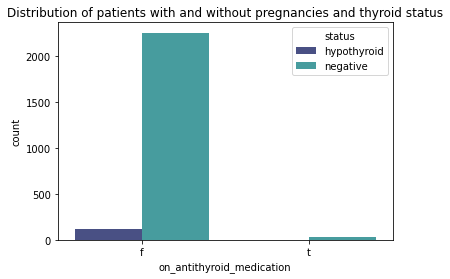

In [ ]:
sns.countplot(x='on_antithyroid_medication', hue='status', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

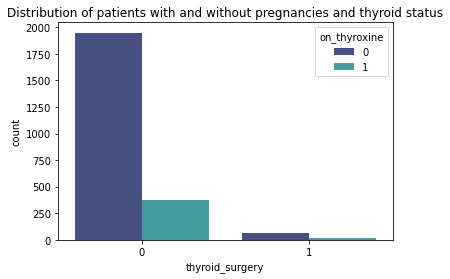

In [ ]:
sns.countplot(x='thyroid_surgery', hue='on_thyroxine', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

> There were a few patients who had thyroid surgery and were on thyroxine, however most patients had not undergone thyroid surgery, however some of those were on thyroxine

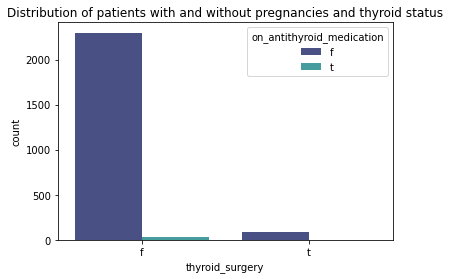

In [ ]:
sns.countplot(x='thyroid_surgery', hue='on_antithyroid_medication', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

> There were no patients who had thyroid surgery and were on antithyroid medication

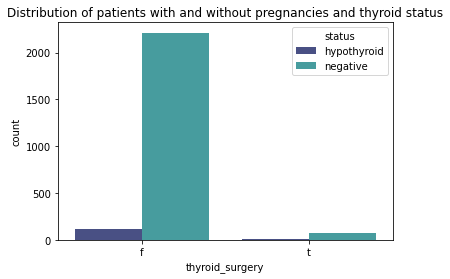

In [ ]:
sns.countplot(x='thyroid_surgery', hue='status', data=thyroid, palette='mako')
plt.title('Distribution of patients with and without pregnancies and thyroid status')
plt.show()

> Most people have not had thyroid surgery and even for those who have few of the grouping have hypothyroid

In [25]:
lst=list(thyroid.columns)
for nm in names:
  lst.remove(nm)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for name in lst:
  thyroid[name]=le.fit_transform(thyroid[name])

In [ ]:
thyroid

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,58.0,0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0
3159,1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0
3160,1,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0
3161,1,74.0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0


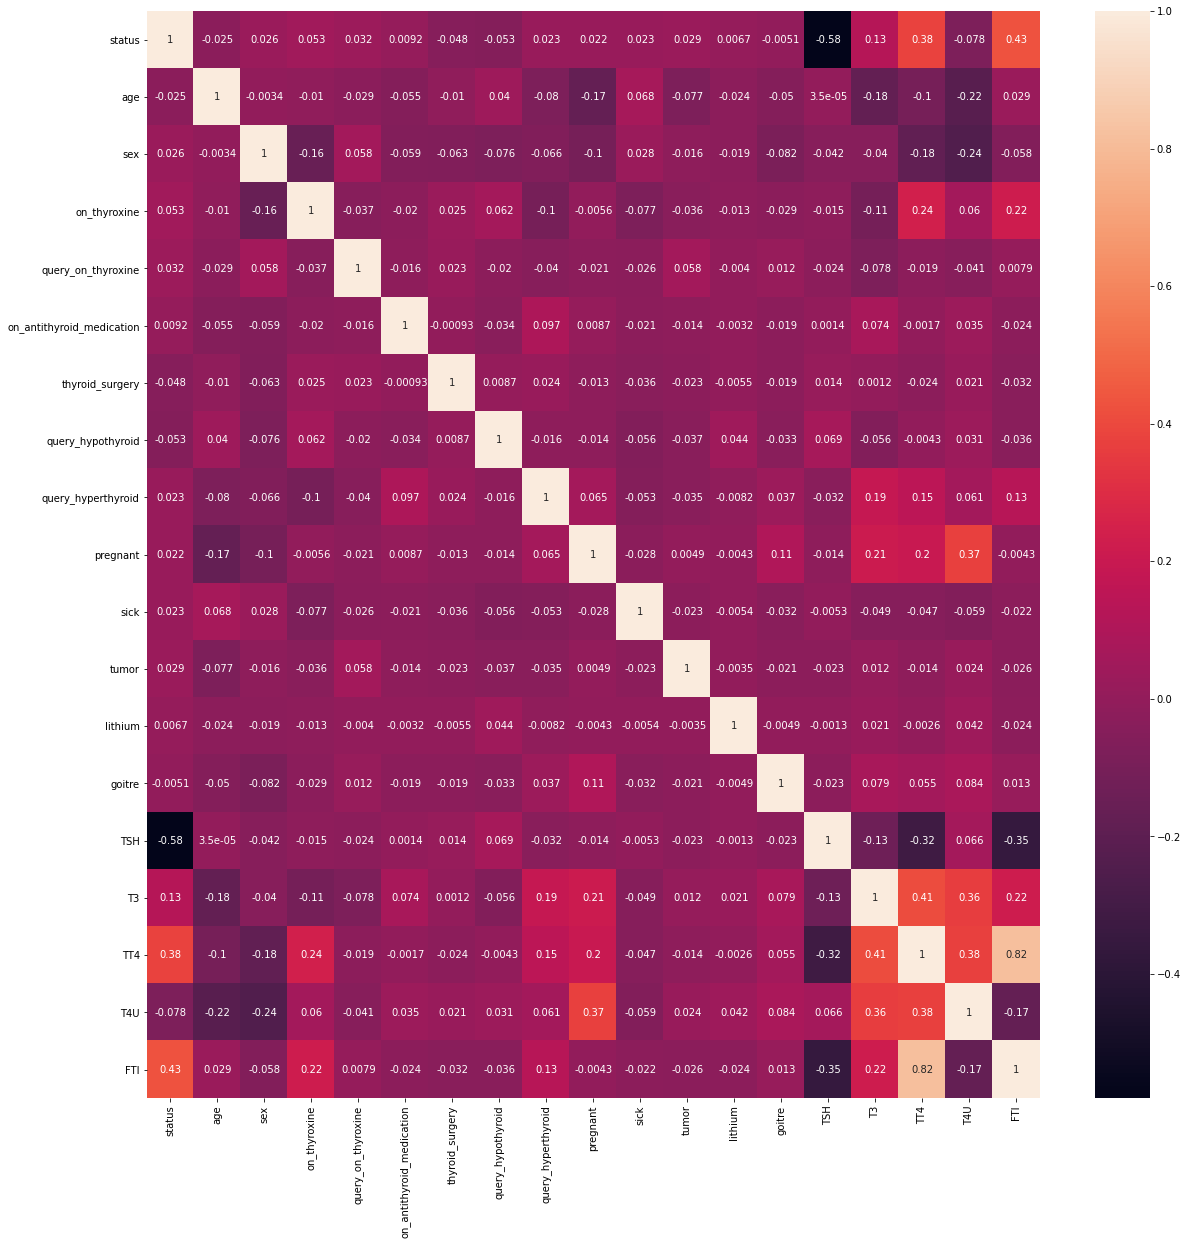

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(thyroid.corr(),annot=True)

## Implementing the solution

#### Decision trees

- importing the necessary libraries for decision trees

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

- spliting the dependent and independent varables and creating train and test sets.

In [29]:
y=thyroid['status'].astype('category')

In [30]:
x=thyroid.drop('status',axis=1)
y=y.cat.codes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

##### RandomForest

- Importing the Random forest clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max=np.arange(1,10)
est=np.arange(100,1000,100)
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':est,'max_depth':max})
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters  {'max_depth': 7, 'n_estimators': 900}


> I used grid search to get the best parameters for the Random forest model

In [ ]:
rforest = RandomForestClassifier(n_estimators=900, max_depth=7, criterion='gini')

rforest = rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comp.describe()

,Actual,Predicted
count,723.000000,723.000000
mean,0.946058,0.959889
std,0.226059,0.196355
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


> Created 100 models

In [ ]:
print('Mean Absolute Error ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error  0.022130013831258646
Mean Squared Error  0.022130013831258646
Root Mean Squared Error  0.14876160066112035
Accuracy  0.9778699861687413


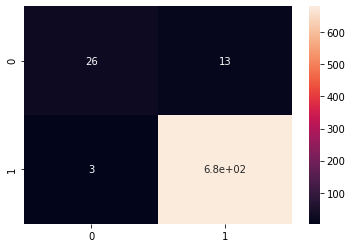

In [ ]:
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

> Most of the calues were correctly predicted, furthermore only 13 positive cases were predicted as negative

##### ADA boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [ ]:
learn=np.arange(0.1,1,0.1)
est=np.arange(100,1000,100)
grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid={'n_estimators':est,'learning_rate':learn})
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters {'learning_rate': 0.1, 'n_estimators': 100}


> I used grid search to get the best parameters for the ada boost model

- Creating the model using the above parameters, i used the same depth as the random forest

In [32]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),learning_rate=0.1,n_estimators=100)
ada = ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comp.describe()

,Actual,Predicted
count,723.000000,723.000000
mean,0.961272,0.954357
std,0.193078,0.208854
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [33]:
print('Mean Absolute Error ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error  0.009681881051175657
Mean Squared Error  0.009681881051175657
Root Mean Squared Error  0.09839654999630656
Accuracy  0.9903181189488244


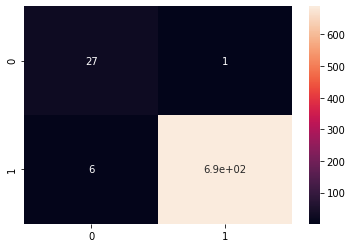

In [34]:
confused=confusion_matrix(y_test, y_pred.round())
sns.heatmap(confused,annot=True)

> The tree had the highest accuracy , furthermore only 2 positive cases were predicted as negative

## Selecting the best decision tree

> Of the two Decision tree models, The random forest model had the highest accuracy predicting the values, moreover it predicted the least False negatives (1) compared to the ada boost model (6). In medicine this would mean life and death hence Rando forest here is the best model since it had the highest accuracy and predicted the least False negatives

In [36]:
importance = pd.DataFrame({'feature': list(x_train.columns),
                           'importance': ada.feature_importances_},index=None).sort_values('importance', ascending = False)
importance.head(5)

,feature,importance
17,FTI,0.632366
13,TSH,0.224676
0,age,0.042329
4,on_antithyroid_medication,0.021147
14,T3,0.019395


> These are the top 5 most import important feature in the Random Forest

In [37]:
importance.tail(5)

,feature,importance
1,sex,0.0
10,tumor,0.0
11,lithium,0.0
12,goitre,0.0
9,sick,0.0


> These are the top 5 least import important feature in the Random Forest

- getting an idea of how the random forest tree looks like

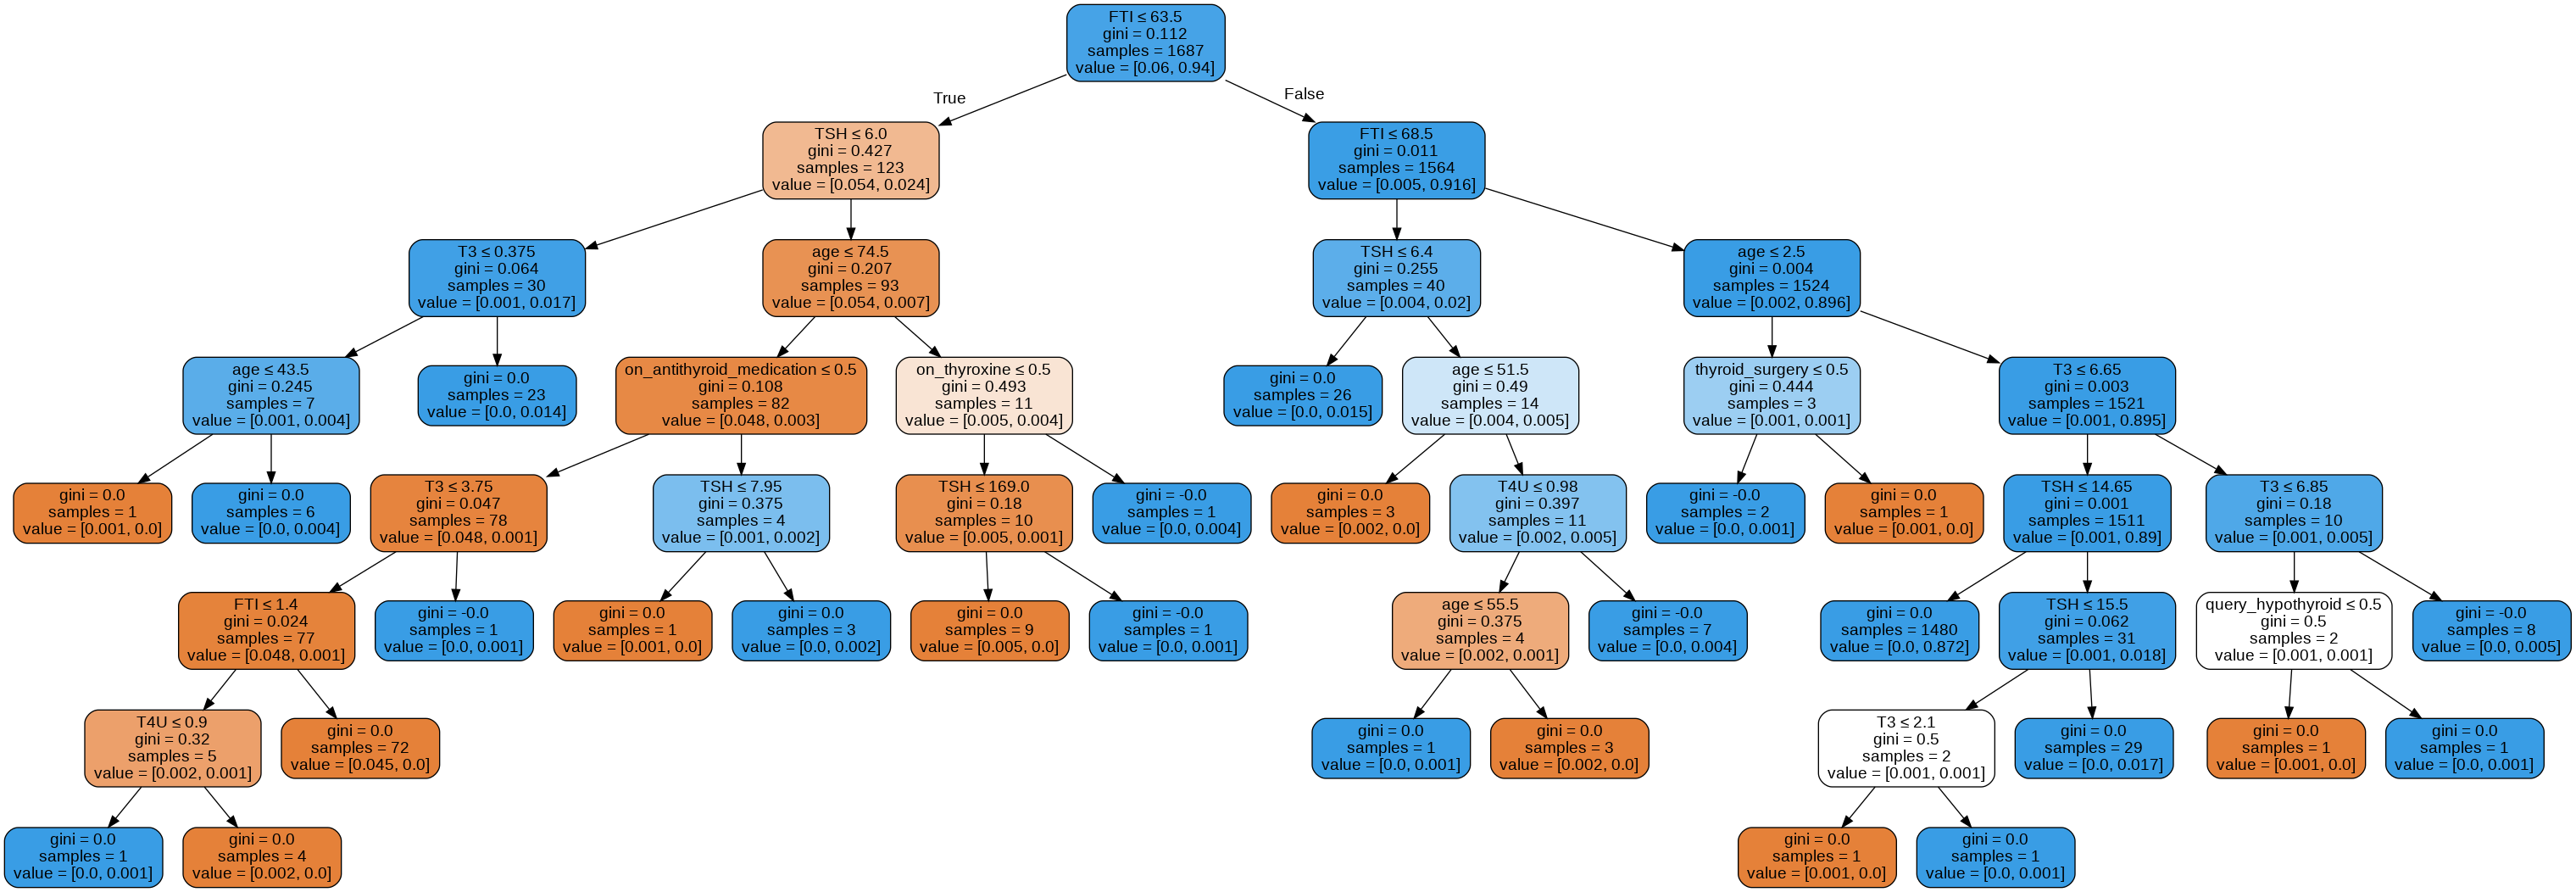

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
# pick a specific tree from the forest
a_tree = ada.estimators_[1]

export_graphviz(a_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rforest.png')
Image(graph.create_png())

>  * The first test performed was on the FTI level.The dataset got split at 55.5 with a gini of 0.044 from 1687 samples.The left children nodes of the ada boosted tree has a bias towards patients with hypothyroid while the right towads those without hypothyroid.
* The second test on those with thyroid was on the TSH level which was split at 5.75.
  - This further illustrates the importance of the two features as shown above in the importance listings

#### Suport Vector machine

- Imprting the general libraries for the SVM models

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

- Selecting the 2 parameters obtained from the decision tree importance list, to use while determining the best model
- Creating the train and test sets

In [ ]:
x_=x[['FTI','TSH']]
y_=y
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.3)

- Creating a visualisation of the distribution of the attributes with the status if the hypothyroid as the hue.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


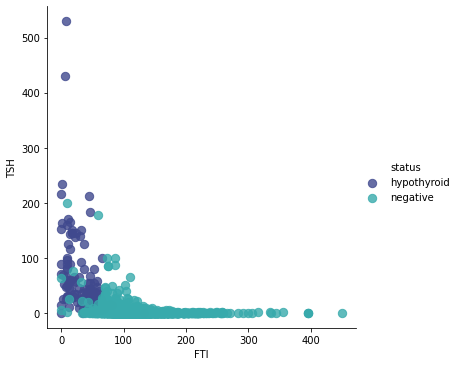

In [ ]:
sns.lmplot('FTI','TSH', data=thyroid, hue='status', palette='mako', fit_reg=False, scatter_kws={"s": 70})

> They are so close i wouldnt be surprised if a model mis clasifies some of them

##### Poly

In [ ]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

- determining the best parameters for the RBF model using grid search

In [ ]:
deg=[2]
gam=[0.5,1,1.5]
grid = GridSearchCV(estimator=SVC(kernel='poly'),param_grid={'degree':deg,'gamma':gam}, verbose = 3,cv=5)   
 
grid.fit(x_, y_)
print('The best parameters ',grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] degree=2, gamma=0.5 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. degree=2, gamma=0.5, score=0.981, total=  51.2s
[CV] degree=2, gamma=0.5 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.2s remaining:    0.0s


[CV] ................. degree=2, gamma=0.5, score=0.981, total= 2.3min
[CV] degree=2, gamma=0.5 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] ................. degree=2, gamma=0.5, score=0.973, total= 2.7min
[CV] degree=2, gamma=0.5 .............................................
[CV] ................. degree=2, gamma=0.5, score=0.979, total= 1.3min
[CV] degree=2, gamma=0.5 .............................................
[CV] ................. degree=2, gamma=0.5, score=0.969, total= 1.2min
[CV] degree=2, gamma=1 ...............................................
[CV] ................... degree=2, gamma=1, score=0.983, total= 4.0min
[CV] degree=2, gamma=1 ...............................................
[CV] ................... degree=2, gamma=1, score=0.981, total= 3.5min
[CV] degree=2, gamma=1 ...............................................
[CV] ................... degree=2, gamma=1, score=0.975, total= 3.6min
[CV] degree=2, gamma=1 ...............................................
[CV] ................... degree=2, gamma=1, score=0.969, total= 4.3min
[CV] degree=2, gamma=1.5 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 42.0min finished


The best parameters  {'degree': 2, 'gamma': 1.5}


In [ ]:
print('The best parameters ',grid.best_params_)

The best parameters  {'degree': 2, 'gamma': 1.5}


* 😶 it took sooooo long to get the best parameters, i originally was testing for degrees up to 6 but the notebook kept freezing at 3 degrees, well more like it took over 2 hours before proceeding to the next parameter, given i did print out the values to see how long each was taking to run.
* just the 2 degrees took 42 minutes to run 15 fits, as complexity of the model increases, computation time increases

* i ended up going for two degrees because there wasnt enough time to wait for all the degrees to compute

- Using the best parameters obtained in the grid serch to make the polynomial model

In [ ]:
poly=SVC(kernel='poly',degree=2,gamma=1.5)
poly.fit(x_train, y_train)
y_pred = poly.predict(x_test)

comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comp.describe()

,Actual,Predicted
count,723.000000,723.000000
mean,0.940526,0.937759
std,0.236674,0.241759
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


- Checking the accuracy of the model

In [ ]:
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

Accuracy  0.983402489626556


- Creating a heatmap of the confusion matrix to see the predictions and errors made by the model

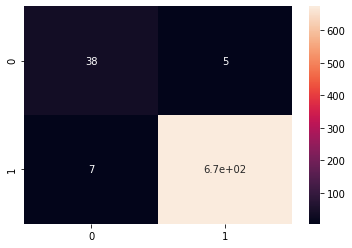

In [ ]:
confused=confusion_matrix(y_test, y_pred.round())
sns.heatmap(confused,annot=True)

> The model performed decently with a really high accuracy score, and very few wrongly predicted values 5 positive results were predicted as negative while 7 negative values were predicted as positive

##### linear

- determining the best parameters , gamma and penalizer (c) , for the Linear kernel using grid search

In [ ]:
gam=[0.5,1,1.5]
c=[1,5,10,15,20]
grid = GridSearchCV(estimator=SVC(kernel='linear'),param_grid={'C':c,'gamma':gam})
grid.fit(x_,y_)
print('The best parameters ',grid.best_params_)

The best parameters  {'C': 20, 'gamma': 0.5}


- Using the best parameters obtained in the grid serch to make the SVC model using the linear kernel

In [ ]:
linear=SVC(kernel='linear',C=20,gamma=0.5)
linear.fit(x_train, y_train) 
y_pred = linear.predict(x_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comp.describe()

,Actual,Predicted
count,723.000000,723.000000
mean,0.940526,0.950207
std,0.236674,0.217667
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


- Checking the accuracy of the model

In [ ]:
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

Accuracy  0.9764868603042877


- Creating a heatmap of the confusion matrix to see the predictions and errors made by the model

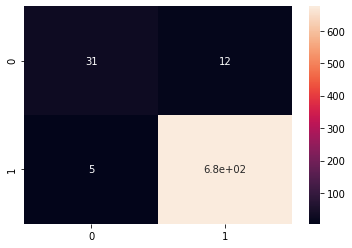

In [ ]:
confused=confusion_matrix(y_test, y_pred.round())
sns.heatmap(confused,annot=True)

> this looks like a contender model, it predicted a good number of accurate values, 12 positive results were predicted as negative while 5 negative values were predicted as positive, it will be a bit tough given this is a model is supposed to be used in a hospital, and could mean life and death.

* Ploting a graph for the linear kernel SVC model to see how it made the classifation

  * This plot only works for the linear model because the oother models do not have coef_ values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


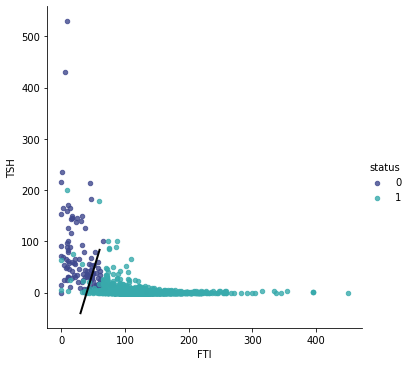

In [ ]:
w = linear.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(30, 60)
yy = a * xx - (linear.intercept_[0]) / w[1]

sns.lmplot('FTI','TSH', data=thyroid, hue='status', palette='mako', fit_reg=False, scatter_kws={"s": 20})
plt.plot(xx, yy, linewidth=2, color='black');


##### RBF

- determining the best parameters , gamma and penalizer (c) , for the RBF kernel using grid search

In [ ]:
gam=[0.5,1,1.5]
c=[1,10,20]
grid = GridSearchCV(estimator=SVC(),param_grid={'C':c,'gamma':gam})
grid.fit(x_,y_)
print('The best parameters ',grid.best_params_)

The best parameters  {'C': 10, 'gamma': 0.5}


- Using the best parameters obtained in the grid serch to make the SVC model using the RBF kernel

In [ ]:
rbf=SVC(C=10,gamma=0.5)
rbf.fit(x_train, y_train)
y_pred = rbf.predict(x_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
comp.describe()

,Actual,Predicted
count,723.000000,723.000000
mean,0.940526,0.993084
std,0.236674,0.082930
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


- Checking the accuracy of the model

In [ ]:

print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

Accuracy  0.9474412171507607


> Creating a heatmap of the confusion matrix to see the predictions and errors made by the model

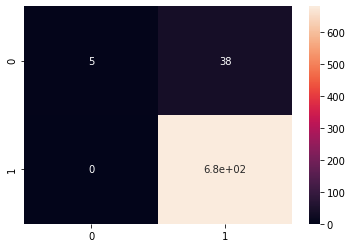

In [ ]:
confused=confusion_matrix(y_test, y_pred.round())
sns.heatmap(confused,annot=True)

> The rbf model had no negative values predicted as positive, however 38 positive values were predicted as negatives, hence is already proven to be a bad model, although the accuracy of the model is at 94 %
* this was the worst performing model

#### Selecting the most succesfull model

> The polynomial offers the highest accuracy among the 3 models therefore is the model i would pick for use, and classified wrongly the positive cases

> I used the 5 most important features from the ada boosted tree for the model

In [ ]:
x__=x[['FTI','TSH','TT4','T3','T4U']]
y__=y
x_train, x_test, y_train, y_test = train_test_split(x__, y__, test_size=0.3)

In [ ]:
poly.fit(x_train, y_train)
y_pred = poly.predict(x_test)

Accuracy  0.9861687413554634


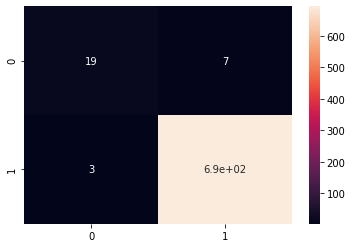

In [ ]:
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))
confused=confusion_matrix(y_test, y_pred.round())
sns.heatmap(confused,annot=True)

* The model with 5 variables has a higher accuracy score compared to the model with just 2 variables, granted i did use the top 5 most important features from the random forest decision tree.

* The model did the best when predicting negative results (3)

* However one downside to the model is it had a worse problem predicting positive results

## Challenging the solution

> Despite the overwhelming advantage the polynomial kernel had in both accuracy and predicting the most important cases( the positive values) it would have been better to check on more degrees to see if there was a beter fit for the dataset, but this would require some more time to compute the parameters assuming the session time is not exceeded.

* It would also have been preferable if there were no wrongly predicted positive results.

* Other kernels may also have offered a better performance, and it would be a good idea to try them out.

## Conclusion

> the ada boosted tree also provided the best results of the two decision trees i used

> it seems quite evident that just the 2 most impportant features to predict hypothyroid prescence were not enough to get a good model, however adding more important features to the model improves the classification accuracy.